Você é uma pesquisadora de um cursinho para estudantes que querem
 ingressar na universidade em 2025. Seu objetivo é retirar informações da base
 de dados do enem do ano anterior para alinhar melhor as estratégias do
 cursinho para cada estudante. O dado possui 6 colunas, 5 delas representam
 as disciplinas do ENEM e uma o gênero das pessoas que fizeram a prova. No
 dado existe a representação de 1000 pessoas, sendo cada uma delas uma
 linha.

In [ ]:
pip install pandas numpy matplotlib scipy seaborn #bibliotecas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\deise\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
#Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [4]:
data = pd.read_json('enem_2023.json')
data.head(5)

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação,Sexo
0,585.669300,686.512178,390.482473,452.281333,546.371706,Homem
1,359.384608,642.084134,NaN,412.205207,741.825256,Mulher
2,622.732384,495.510719,443.183580,669.683401,684.515750,Homem
3,350.164605,602.041588,413.979810,676.608952,671.237114,Homem
4,384.093657,489.249140,609.758123,520.426698,744.375048,Homem


 1. Qual das disciplinas tem a maior amplitude de nota? 

In [ ]:
#Conhecer as estatísticas básicas dos dados
data.describe()

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação
count,897.000000,936.000000,824.000000,924.000000,860.000000
mean,514.524809,527.042281,499.315583,535.965660,637.783532
std,84.009313,77.811519,78.760404,86.648100,115.339972
min,287.000000,289.900000,314.400000,319.800000,270.839965
25%,458.360558,475.424546,444.709076,479.172971,556.468366
50%,515.045250,524.519920,500.479263,533.247767,635.273973
75%,571.635876,581.401952,548.751678,592.912963,715.989868
max,804.456317,763.919695,802.004568,807.877902,1000.000000


In [12]:
#Descobrir a amplitude das disciplinas
amplitude_nota_lg = data['Linguagens'].max() - data['Linguagens'].min()
amplitude_nota_ch = data['Ciências humanas'].max() - data['Ciências humanas'].min()
amplitude_nota_cn = data['Ciências da natureza'].max() - data['Ciências da natureza'].min()
amplitude_nota_mt = data['Matemática'].max() - data['Matemática'].min()
print(f"Amplitude da disciplina de Linguagens é: {amplitude_nota_lg:.2f}")
print(f"Amplitude da disciplina de Ciências humanas é: {amplitude_nota_ch:.2f}")
print(f"Amplitude da disciplina de Ciências da natureza é: {amplitude_nota_cn:.2f}")
print(f"Amplitude da disciplina de Matemática é: {amplitude_nota_mt:.2f}")

#Descobrir a disciplina com a maior amplitude
amplitudes = {'Linguagens': amplitude_nota_lg,'Ciências humanas': amplitude_nota_ch,'Ciências da natureza': amplitude_nota_cn,'Matemática': amplitude_nota_mt}

disciplina_maior_amplitude = max(amplitudes, key=amplitudes.get)
maior_amplitude = amplitudes[disciplina_maior_amplitude]

print(f"A disciplina com a maior amplitude é {disciplina_maior_amplitude} com uma amplitude de {maior_amplitude:.2f}")


Amplitude da disciplina de Linguagens é: 517.46
Amplitude da disciplina de Ciências humanas é: 474.02
Amplitude da disciplina de Ciências da natureza é: 487.60
Amplitude da disciplina de Matemática é: 488.08
A disciplina com a maior amplitude é Linguagens com uma amplitude de 517.46


2. Qual é a média e a
 mediana para cada uma das disciplinas? (Lembre-se de remover todos os
 valores nulos quando considerar a mediana)

In [13]:
#Realizar a média das disciplinas
media_linguagens = data['Linguagens'].mean()
media_ciencias_humanas = data['Ciências humanas'].mean()
media_ciencias_natureza = data['Ciências da natureza'].mean()
media_matematica = data['Matemática'].mean()
print(f"Média da disciplina de Linguagens é: {media_linguagens:.2f}")
print(f"Média da disciplina de Ciências humanas é: {media_ciencias_humanas:.2f}")
print(f"Média da disciplina de Ciências da natureza é: {media_ciencias_natureza:.2f}")
print(f"Média da disciplina de Matemática é: {media_matematica:.2f}")


Média da disciplina de Linguagens é: 514.52
Média da disciplina de Ciências humanas é: 527.04
Média da disciplina de Ciências da natureza é: 499.32
Média da disciplina de Matemática é: 535.97


In [ ]:
#Descobrir quantidade de valores nulos
print(data.isnull().sum())


Linguagens              103
Ciências humanas         64
Ciências da natureza    176
Matemática               76
Redação                 140
Sexo                      0
dtype: int64


In [16]:
#Remover os valores nulos
data.dropna(inplace=True)
print(data.isnull().sum())
print('Valores nulos removidos!')

Linguagens              0
Ciências humanas        0
Ciências da natureza    0
Matemática              0
Redação                 0
Sexo                    0
dtype: int64
Valores nulos removidos!


In [17]:
#Realizar a mediana das notas
mediana_linguagens = data['Linguagens'].median()
mediana_ciencias_humanas = data['Ciências humanas'].median()
media_ciencias_humanas = data['Ciências da natureza'].median()
mediana_matematica = data['Matemática'].median()
print(f"Mediana da disciplina de Linguagens é: {mediana_linguagens:.2f}")
print(f"Mediana da disciplina de Ciências humanas é: {mediana_ciencias_humanas:.2f}")
print(f"Mediana da disciplina de Ciências da natureza é: {media_ciencias_humanas:.2f}")
print(f"Mediana da disciplina de Matemática é: {mediana_matematica:.2f}")


Mediana da disciplina de Linguagens é: 517.13
Mediana da disciplina de Ciências humanas é: 528.50
Mediana da disciplina de Ciências da natureza é: 502.94
Mediana da disciplina de Matemática é: 532.96


3. Considerando o curso de Ciência da Computação da UFPE, onde o peso
 cada uma das disciplinas ponderado:
 a. Redação - 2 
b. Matemática e suas Tecnologias - 4 
c. Linguagens, Códigos e suas Tecnologias - 2 
d. Ciências Humanas e suas Tecnologias - 1 
e. Ciências da Natureza e suas Tecnologias - 1
 Qual o desvio padrão e média das notas dos 500 estudantes mais bem
 colocados considerando esses pesos?

In [ ]:
# Descobrir os primeiros 500 estudantes mais bem colocados
notas = data[['Linguagens', 'Ciências humanas', 'Ciências da natureza', 'Matemática', 'Redação']].sum(axis=1)
data['Notas'] = notas  
data = data.sort_values(by='Notas', ascending=False)
top_500 = data.head(500)

# Calcular a nota ponderada para cada estudante
pesos = {'Redação': 2, 'Matemática': 4, 'Linguagens': 2, 'Ciências humanas': 1, 'Ciências da natureza': 1}

top_500['Nota_Ponderada'] = (top_500['Redação'] * pesos['Redação'] + top_500['Matemática'] * pesos['Matemática'] + top_500['Linguagens'] * pesos['Linguagens'] + top_500['Ciências humanas'] * pesos['Ciências humanas'] + top_500['Ciências da natureza'] * pesos['Ciências da natureza']) / sum(pesos.values())

# Calcular a média e o desvio padrão das notas ponderadas
media = top_500['Nota_Ponderada'].mean()
desvio_padrao = top_500['Nota_Ponderada'].std()

print(f"Média das notas ponderadas dos 500 estudantes mais bem colocados: {media:.2f}")
print(f"Desvio padrão das notas ponderadas dos 500 estudantes mais bem colocados: {desvio_padrao:.2f}")

Média das notas ponderadas dos 500 estudantes mais bem colocados: 556.44
Desvio padrão das notas ponderadas dos 500 estudantes mais bem colocados: 41.72


C:\Users\deise\AppData\Local\Temp\ipykernel_21312\4029675773.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_500['Nota_Ponderada'] = (


4. Se todos esses estudantes aplicassem para ciência da computação e existem apenas 40 vagas, qual seria a variância e média da nota dos estudantes que entraram no curso de ciência da computação?

In [29]:
# Selecionar os 40 primeiros estudantes
top_40 = top_500.head(40)

# Calcular a média e a variância das notas ponderadas dos 40 estudantes
media_top_40 = top_40['Nota_Ponderada'].mean()
variancia_top_40 = top_40['Nota_Ponderada'].var()

print(f"Média das notas ponderadas dos 40 estudantes mais bem colocados: {media_top_40:.2f}")
print(f"Variância das notas ponderadas dos 40 estudantes mais bem colocados: {variancia_top_40:.2f}")

Média das notas ponderadas dos 40 estudantes mais bem colocados: 626.64
Variância das notas ponderadas dos 40 estudantes mais bem colocados: 652.71


 5. Qual o valor do teto do terceiro quartil para as disciplinas de matemática e linguagens?

In [33]:
# Calcular o terceiro quartil para as disciplinas de Matemática e Linguagens
terceiro_quartil_matematica = data['Matemática'].quantile(0.75)
terceiro_quartil_linguagens = data['Linguagens'].quantile(0.75)

print(f"Valor do teto do terceiro quartil para Matemática: {terceiro_quartil_matematica:.2f}")
print(f"Valor do teto do terceiro quartil para Linguagens: {terceiro_quartil_linguagens:.2f}")

Valor do teto do terceiro quartil para Matemática: 591.34
Valor do teto do terceiro quartil para Linguagens: 572.65


 6. Faça o histograma de Redação e Linguagens, de 20 em 20 pontos. Podemos dizer que são histogramas simétricos, justifique classifique se não assimétricas?

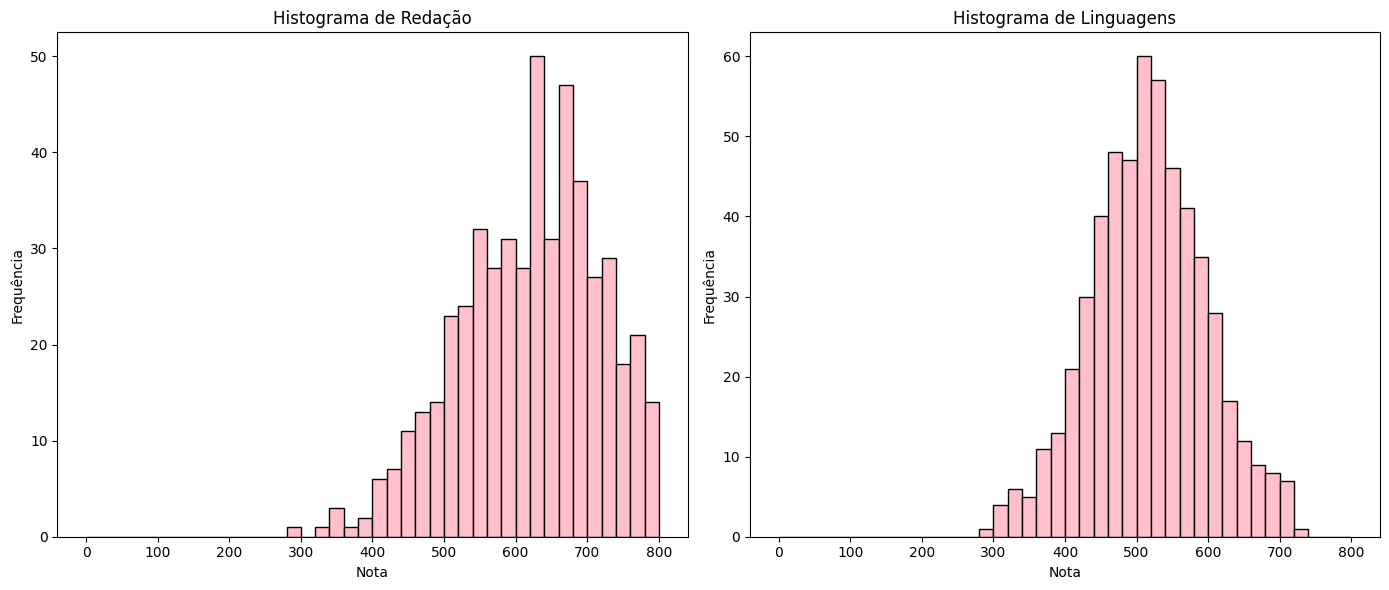

Assimetria do histograma de Redação: 0.02
Assimetria do histograma de Linguagens: 0.07
O histograma de Redação é aproximadamente simétrico.
O histograma de Linguagens é aproximadamente simétrico.


In [ ]:
# Apresentar o tamanho dos histogramas
plt.figure(figsize=(14, 6))

# Criar histograma de Redação
plt.subplot(1, 2, 1)
plt.hist(data['Redação'], bins=range(0, 801, 20), color='pink', edgecolor='black')
plt.title('Histograma de Redação')
plt.xlabel('Nota')
plt.ylabel('Frequência')

# Criar histograma de Linguagens
plt.subplot(1, 2, 2)
plt.hist(data['Linguagens'], bins=range(0, 801, 20), color='pink', edgecolor='black')
plt.title('Histograma de Linguagens')
plt.xlabel('Nota')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

# Análisar a simetria dos histogramas
redacao_skewness = data['Redação'].skew()
linguagens_skewness = data['Linguagens'].skew()

print(f"Assimetria do histograma de Redação: {redacao_skewness:.2f}")
print(f"Assimetria do histograma de Linguagens: {linguagens_skewness:.2f}")

if abs(redacao_skewness) < 0.5:
    print("O histograma de Redação é aproximadamente simétrico.")
elif redacao_skewness > 0:
    print("O histograma de Redação é assimétrico positivo (assimetria à direita).")
else:
    print("O histograma de Redação é assimétrico negativo (assimetria à esquerda).")

if abs(linguagens_skewness) < 0.5:
    print("O histograma de Linguagens é aproximadamente simétrico.")
elif linguagens_skewness > 0:
    print("O histograma de Linguagens é assimétrico positivo (assimetria à direita).")
else:
    print("O histograma de Linguagens é assimétrico negativo (assimetria à esquerda).")

 7. Agora coloque um range fixo de 0 até 1000, você ainda tem a mesma opinião quanto a simetria? [plt.hist(dado, bins=_, range=[0, 1000])

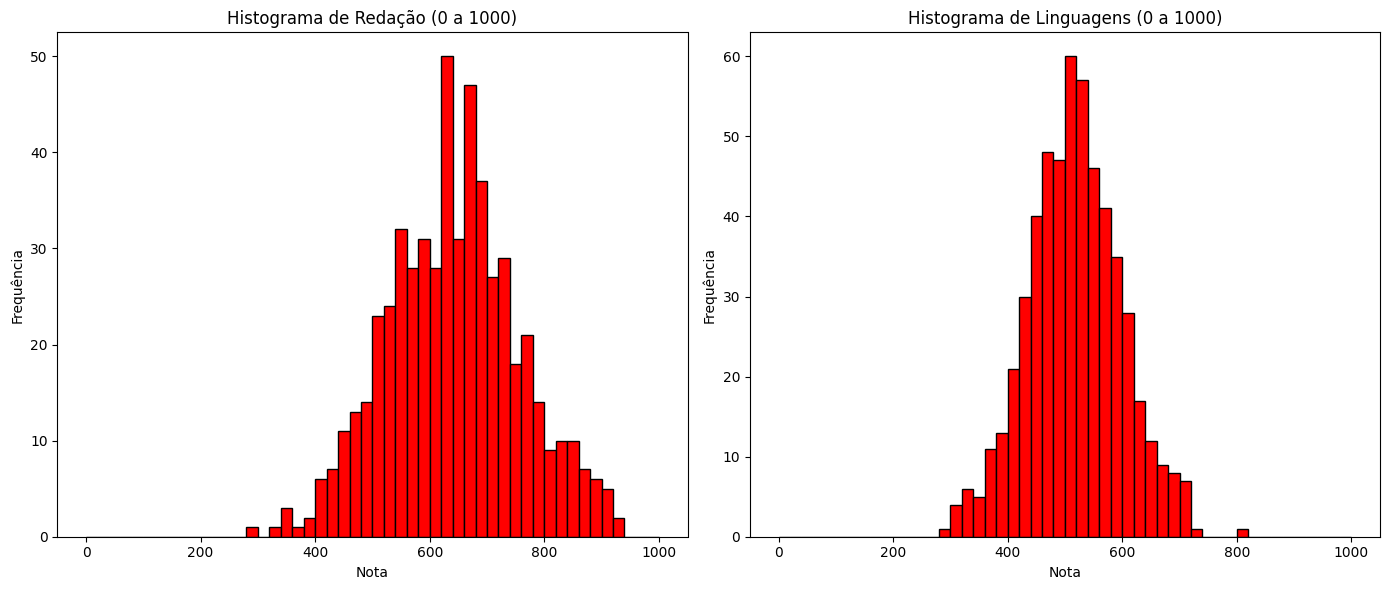

Assimetria do histograma de Redação: 0.02
Assimetria do histograma de Linguagens: 0.07
O histograma de Redação é aproximadamente simétrico.
O histograma de Linguagens é aproximadamente simétrico.


In [ ]:
# Apresentar o tamanho dos histogramas
plt.figure(figsize=(14, 6))

# Criar histograma de Redação
plt.subplot(1, 2, 1)
plt.hist(data['Redação'], bins=50, range=[0, 1000], color='red', edgecolor='black')
plt.title('Histograma de Redação (0 a 1000)')
plt.xlabel('Nota')
plt.ylabel('Frequência')

# Criar histograma de Linguagens
plt.subplot(1, 2, 2)
plt.hist(data['Linguagens'], bins=50, range=[0, 1000], color='red', edgecolor='black')
plt.title('Histograma de Linguagens (0 a 1000)')
plt.xlabel('Nota')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

# Análisar a simetria dos histogramas
redacao_skewness = data['Redação'].skew()
linguagens_skewness = data['Linguagens'].skew()

print(f"Assimetria do histograma de Redação: {redacao_skewness:.2f}")
print(f"Assimetria do histograma de Linguagens: {linguagens_skewness:.2f}")

if abs(redacao_skewness) < 0.5:
    print("O histograma de Redação é aproximadamente simétrico.")
elif redacao_skewness > 0:
    print("O histograma de Redação é assimétrico positivo (assimetria à direita).")
else:
    print("O histograma de Redação é assimétrico negativo (assimetria à esquerda).")

if abs(linguagens_skewness) < 0.5:
    print("O histograma de Linguagens é aproximadamente simétrico.")
elif linguagens_skewness > 0:
    print("O histograma de Linguagens é assimétrico positivo (assimetria à direita).")
else:
    print("O histograma de Linguagens é assimétrico negativo (assimetria à esquerda).")

8. Faça um boxplot para as notas de Ciências da Natureza e Redação, analisando os quartis e identificando possíveis outliers. Utilize o método IQR (Intervalo Interquartílico) para essa análise.

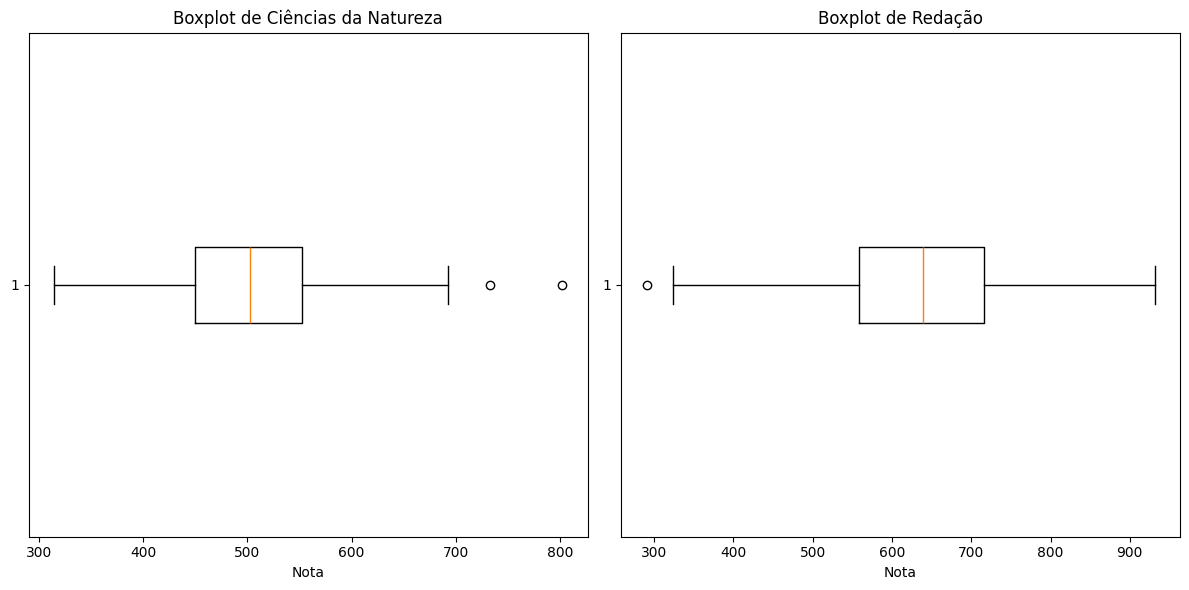

Outliers em Ciências da Natureza:
     Linguagens  Ciências humanas  Ciências da natureza  Matemática  \
325  618.876115        432.687076            802.004568  560.289340   
482  370.689068        524.709047            732.502964  408.637397   

        Redação   Sexo        Notas  
325  601.319954  Homem  3015.177053  
482  813.910774  Homem  2850.449250  
Outliers em Redação:
     Linguagens  Ciências humanas  Ciências da natureza  Matemática  \
545  554.412589         495.33427            566.178079  423.356151   

        Redação   Sexo        Notas  
545  290.308608  Homem  2329.589697  


In [44]:
# Apresentar o tamanho do Boxplot
plt.figure(figsize=(12, 6))

# Criar Boxplot de Ciências da Natureza
plt.subplot(1, 2, 1)
plt.boxplot(data['Ciências da natureza'], vert=False)
plt.title('Boxplot de Ciências da Natureza')
plt.xlabel('Nota')

# Criar Boxplot de Redação
plt.subplot(1, 2, 2)
plt.boxplot(data['Redação'], vert=False)
plt.title('Boxplot de Redação')
plt.xlabel('Nota')

plt.tight_layout()
plt.show()

# Análisar os outliers usando o método IQR
def identificar_outliers(coluna):
    Q1 = data[coluna].quantile(0.25)
    Q3 = data[coluna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    outliers = data[(data[coluna] < limite_inferior) | (data[coluna] > limite_superior)]
    return outliers

outliers_cn = identificar_outliers('Ciências da natureza')
outliers_redacao = identificar_outliers('Redação')

print(f"Outliers em Ciências da Natureza:\n{outliers_cn}")
print(f"Outliers em Redação:\n{outliers_redacao}")

 9. Remova todos os outliers e verifique se eles são passíveis de alterar a média nacional significativamente? (considere significativamente um valor acima de 5%)

In [45]:
# Remover os outliers
data_sem_outliers = data.copy()
data_sem_outliers = data_sem_outliers[~data_sem_outliers.index.isin(outliers_cn.index)]
data_sem_outliers = data_sem_outliers[~data_sem_outliers.index.isin(outliers_redacao.index)]

# Calcular a média antes e depois da remoção dos outliers
media_cn_antes = data['Ciências da natureza'].mean()
media_redacao_antes = data['Redação'].mean()
media_cn_depois = data_sem_outliers['Ciências da natureza'].mean()
media_redacao_depois = data_sem_outliers['Redação'].mean()

# Verificar se a alteração é significativa (acima de 5%)
alteracao_cn = abs(media_cn_depois - media_cn_antes) / media_cn_antes * 100
alteracao_redacao = abs(media_redacao_depois - media_redacao_antes) / media_redacao_antes * 100

print(f"Média de Ciências da Natureza antes da remoção dos outliers: {media_cn_antes:.2f}")
print(f"Média de Ciências da Natureza depois da remoção dos outliers: {media_cn_depois:.2f}")
print(f"Alteração na média de Ciências da Natureza: {alteracao_cn:.2f}%")

print(f"Média de Redação antes da remoção dos outliers: {media_redacao_antes:.2f}")
print(f"Média de Redação depois da remoção dos outliers: {media_redacao_depois:.2f}")
print(f"Alteração na média de Redação: {alteracao_redacao:.2f}%")

if alteracao_cn > 5:
    print("A remoção dos outliers alterou significativamente a média de Ciências da Natureza.")
else:
    print("A remoção dos outliers não alterou significativamente a média de Ciências da Natureza.")

if alteracao_redacao > 5:
    
    print("A remoção dos outliers alterou significativamente a média de Redação.")
else:
    print("A remoção dos outliers não alterou significativamente a média de Redação.")

Média de Ciências da Natureza antes da remoção dos outliers: 502.14
Média de Ciências da Natureza depois da remoção dos outliers: 501.05
Alteração na média de Ciências da Natureza: 0.22%
Média de Redação antes da remoção dos outliers: 641.19
Média de Redação depois da remoção dos outliers: 641.59
Alteração na média de Redação: 0.06%
A remoção dos outliers não alterou significativamente a média de Ciências da Natureza.
A remoção dos outliers não alterou significativamente a média de Redação.


 10. Considerando valores nulos, tente encontrar qual seria a melhor medida  de tendência que pode substituir as notas nulas. Média, moda ou mediana? Substitua o valor por todos os três e diga qual delas altera menos a média geral e o desvio padrão.

In [ ]:
#Colocando novamento a base de dados, para considerar os valores nulos
data = pd.read_json('enem_2023.json')

# Selecionar apenas as colunas numéricas
data_numerico = data.select_dtypes(include=[np.number])

# Calcular a média, moda e mediana das notas
media = data_numerico.mean()
moda = data_numerico.mode().iloc[0]
mediana = data_numerico.median()

# Verificar a quantidade de valores nulos em cada coluna
print("Quantidade de valores nulos em cada coluna antes da substituição:")
print(data_numerico.isnull().sum())

# Criar Função para substituir valores nulos e calcular a média e o desvio padrão
def substituir_e_calcular(data, valor_substituicao):
    data_substituida = data.fillna(valor_substituicao)
    media_geral = data_substituida.mean()
    desvio_padrao = data_substituida.std()
    return media_geral, desvio_padrao

# Substituir valores nulos pela média
media_geral_media, desvio_padrao_media = substituir_e_calcular(data_numerico, media)

# Substituir valores nulos pela moda
media_geral_moda, desvio_padrao_moda = substituir_e_calcular(data_numerico, moda)

# Substituir valores nulos pela mediana
media_geral_mediana, desvio_padrao_mediana = substituir_e_calcular(data_numerico, mediana)

# Calcular a média geral e o desvio padrão originais (sem substituição)
media_geral_original = data_numerico.mean()
desvio_padrao_original = data_numerico.std()

# Comparar as alterações na média geral e no desvio padrão
alteracao_media_media = abs(media_geral_media - media_geral_original) / media_geral_original * 100
alteracao_desvio_padrao_media = abs(desvio_padrao_media - desvio_padrao_original) / desvio_padrao_original * 100

alteracao_media_moda = abs(media_geral_moda - media_geral_original) / media_geral_original * 100
alteracao_desvio_padrao_moda = abs(desvio_padrao_moda - desvio_padrao_original) / desvio_padrao_original * 100

alteracao_media_mediana = abs(media_geral_mediana - media_geral_original) / media_geral_original * 100
alteracao_desvio_padrao_mediana = abs(desvio_padrao_mediana - desvio_padrao_original) / desvio_padrao_original * 100

print(f"Alteração na média geral ao substituir pela média: {alteracao_media_media.mean():.2f}%")
print(f"Alteração no desvio padrão ao substituir pela média: {alteracao_desvio_padrao_media.mean():.2f}%")

print(f"Alteração na média geral ao substituir pela moda: {alteracao_media_moda.mean():.2f}%")
print(f"Alteração no desvio padrão ao substituir pela moda: {alteracao_desvio_padrao_moda.mean():.2f}%")

print(f"Alteração na média geral ao substituir pela mediana: {alteracao_media_mediana.mean():.2f}%")
print(f"Alteração no desvio padrão ao substituir pela mediana: {alteracao_desvio_padrao_mediana.mean():.2f}%")

# Determinar qual medida altera menos a média geral e o desvio padrão
melhor_medida = 'média' if alteracao_media_media.mean() < alteracao_media_moda.mean() and alteracao_media_media.mean() < alteracao_media_mediana.mean() else 'moda' if alteracao_media_moda.mean() < alteracao_media_mediana.mean() else 'mediana'
print(f"A melhor medida para substituir os valores nulos é: {melhor_medida}")

Quantidade de valores nulos em cada coluna antes da substituição:
Linguagens              103
Ciências humanas         64
Ciências da natureza    176
Matemática               76
Redação                 140
dtype: int64
Alteração na média geral ao substituir pela média: 0.00%
Alteração no desvio padrão ao substituir pela média: 5.79%
Alteração na média geral ao substituir pela moda: 5.01%
Alteração no desvio padrão ao substituir pela moda: 27.20%
Alteração na média geral ao substituir pela mediana: 0.04%
Alteração no desvio padrão ao substituir pela mediana: 5.79%
A melhor medida para substituir os valores nulos é: média
